## Introduction to keras

COE49412

Spring 2020

Imran A. Zualkernan

The purpose of this lecture is to use the MNIST dataset to:

1) Introduce keras
2) Show how to prepare inputs and outputs
3) Show how to compile and train a model
4) Show how to do K-fold evaluation of a keras model


In [63]:
import numpy as np
import keras
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [64]:
## Let us explore the form of the data we just loaded

print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

# We note that these are 60000 28x28 images.

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


7
(28, 28)


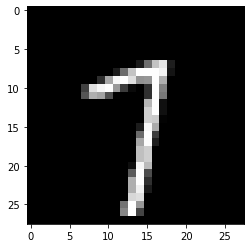

In [75]:
# Show an image 
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

def img_show(img):
    img = Image.fromarray(np.uint8(img))
    plt.imshow(img, cmap = 'gray')

img = X_train[42]
label = Y_train[42]
print(label) # 7

print(img.shape)

img_show(img)

In [76]:
# Y_train simply has labels for digits
print(Y_train[42])
print(Y_test[42])

7
4


In [77]:
# Normalize the images.
X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(X_train.shape) 
print(X_test.shape) 

# One hot encode the y data 
# This means that a label of 2 will become
# [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y_train = Y_train.reshape(-1,1)
Y_test  = Y_test.reshape(-1,1)
Y_train = ohe.fit_transform(Y_train).toarray()
Y_test  =  ohe.fit_transform(Y_test).toarray()

print(Y_train.shape)
print(Y_test.shape)

print(Y_train[42])
print(Y_test[42])

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


/Users/izualkernan/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/izualkernan/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify

In [50]:
# Now we will specify the layers of our 
# keras model.

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim = 784,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile the model specifying the loss function
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Train the model using train and test and a batch 
# size of 64 for 5 epochs

model.fit(X_train, Y_train,
          batch_size=64,
          epochs=5,
          verbose =1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
60000/60000 [==============================] - 3s 45us/step - loss: 1.2212 - accuracy: 0.5818
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.6381 - accuracy: 0.8020
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.5460 - accuracy: 0.8343
Epoch 4/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.4867 - accuracy: 0.8544
Epoch 5/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.4535 - accuracy: 0.8655
Test loss: 0.442646514248848
Test accuracy: 0.8658999800682068


In [58]:
# This function will create the actual and predicted
# vectors for further evaluation.

def generate_actual_predicted(model, X_test, Y_test):
    # Get the predictions
    Y_pred = model.predict(X_test)

    # Create a list of predictions

    #Converting predictions to label
    predicted = list()
    for i in range(len(Y_pred)):
        predicted.append(np.argmax(Y_pred[i]))

    #Converting one hot encoded test label back to label
    actual = list()
    for i in range(len(Y_test)):
        actual.append(np.argmax(Y_test[i]))

    return actual, predicted

actual, predicted = generate_actual_predicted(model, X_test, Y_test)

In [37]:
# Now we can determine the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(actual,predicted)
print(cm)

from sklearn.metrics import accuracy_score
print(accuracy_score(actual, predicted))

[[ 956    0    7    1    1    2    9    1    2    1]
 [   0 1071    7   14    0    5    2    0   36    0]
 [  15    1  926   27    7    2   22    7   22    3]
 [   8    8   62  795    0   75    1   27   29    5]
 [   1    1   12    0  871    3   12    0   11   71]
 [  21    1   11   77   14  688   30   21   24    5]
 [  22    1   22    0    7   11  893    0    2    0]
 [   8    3   19   25    5    3    0  876   21   68]
 [   7    9   42   47   25   28   16   25  765   10]
 [  13    3    1    5   99    9    0   48   13  818]]
0.8659


In [38]:
# We will plot the "averages across classes" for each 
# of the metrics. Macro gives us the average of particular
# values across classes. This is a very crude measure.

from sklearn.metrics import f1_score
print(f1_score(actual, predicted, average='macro'))

from sklearn.metrics import precision_score
print(precision_score(actual, predicted, average='macro'))

from sklearn.metrics import recall_score
print(recall_score(actual, predicted, average='macro'))

0.8636217381669461
0.8640719654638872
0.8642218901201641


In [39]:
# To determine the precision, recall and F1-score
# for each class.
# We can derive each 2x2 confusion metric by hand
# or we can use the following nice function to do so

from sklearn.metrics import classification_report
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       980
           1       0.98      0.94      0.96      1135
           2       0.83      0.90      0.87      1032
           3       0.80      0.79      0.79      1010
           4       0.85      0.89      0.87       982
           5       0.83      0.77      0.80       892
           6       0.91      0.93      0.92       958
           7       0.87      0.85      0.86      1028
           8       0.83      0.79      0.81       974
           9       0.83      0.81      0.82      1009

    accuracy                           0.87     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



In [41]:
# Let us be lazy and use the test data 
# as "validation data"

history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=5, batch_size=32)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.4352 - accuracy: 0.8693 - val_loss: 0.4256 - val_accuracy: 0.8732
Epoch 2/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.4135 - accuracy: 0.8761 - val_loss: 0.3880 - val_accuracy: 0.8834
Epoch 3/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.4004 - accuracy: 0.8798 - val_loss: 0.3911 - val_accuracy: 0.8846
Epoch 4/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3911 - accuracy: 0.8832 - val_loss: 0.3879 - val_accuracy: 0.8887
Epoch 5/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.3820 - accuracy: 0.8863 - val_loss: 0.3790 - val_accuracy: 0.8889


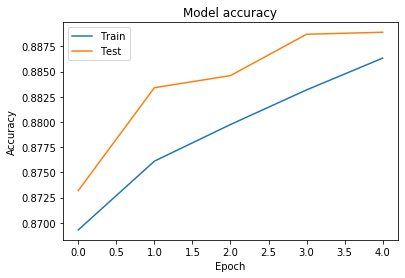

In [44]:
## Plotting the accuracy over time. 

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

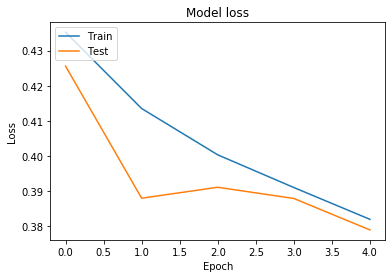

In [46]:
# Plotting the loss over time
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [48]:
# What if we wish to do K-fold 

def create_model():
  model = Sequential()
  model.add(Dense(8, input_dim = 784,activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(10, activation='softmax'))
 
  model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )
  return model


In [60]:
# This will only use the training data 
# and test it on each partition
from sklearn.model_selection import KFold
 
n_split=3
 
# We will split the the data n_split times
# and create and for the model with the said
# parameters

for train_index,test_index in KFold(n_split).split(X_train):
  
  # use the index to generate training an testing sets
  x_train,x_test=X_train[train_index],X_train[test_index]
  y_train,y_test=Y_train[train_index],Y_train[test_index]
  
  # create and fit the model
  model=create_model()
  model.fit(x_train, y_train,epochs=2)
  
  # print and show generic metrics available
  print(model.metrics_names)
  print('Model evaluation ',model.evaluate(x_test,y_test))
  
  # calculate and print own metrics
  actual, predicted = generate_actual_predicted(model, x_test, y_test)
  print("precision ",precision_score(actual, predicted, average='macro'))
  print("recall ", recall_score(actual, predicted, average='macro'))
  

Epoch 1/2
40000/40000 [==============================] - 3s 82us/step - loss: 1.0120 - accuracy: 0.6596
Epoch 2/2
40000/40000 [==============================] - 3s 71us/step - loss: 0.4992 - accuracy: 0.8515
['loss', 'accuracy']
20000/20000 [==============================] - 1s 36us/step
Model evaluation  [0.44746362763643266, 0.8701000213623047]
precision  0.871317491821363
recall  0.8673781338269091
Epoch 1/2
40000/40000 [==============================] - 4s 91us/step - loss: 1.1410 - accuracy: 0.5971
Epoch 2/2
40000/40000 [==============================] - 3s 82us/step - loss: 0.6706 - accuracy: 0.7959
['loss', 'accuracy']
20000/20000 [==============================] - 1s 42us/step
Model evaluation  [0.6369851336956024, 0.8083000183105469]
precision  0.8096303105809597
recall  0.8051560087138702
Epoch 1/2
40000/40000 [==============================] - 4s 95us/step - loss: 1.3291 - accuracy: 0.4982
Epoch 2/2
40000/40000 [==============================] - 3s 85us/step - loss: 1.0086 -